In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def system(t, state, gamma_x):
    x, y = state
    f = (1 + x**2 + alpha * sigma * x**4) / ((1 + x**2 + sigma * x**4) * (1 + y**4)) - gamma_x * x
    g = ((1 + x**2 + alpha * sigma * x**4) / ((1 + x**2 + sigma * x**4) * (1 + y**4)) - gamma_y * y) / tau_y
    return [f, g]

<>:11: SyntaxWarning: invalid escape sequence '\g'
<>:38: SyntaxWarning: invalid escape sequence '\g'
<>:11: SyntaxWarning: invalid escape sequence '\g'
<>:38: SyntaxWarning: invalid escape sequence '\g'
C:\Users\guyda\AppData\Local\Temp\ipykernel_23232\548143587.py:11: SyntaxWarning: invalid escape sequence '\g'
  fig.suptitle("Phase Portraits for Different $\gamma_x$ Values", fontsize=17)
C:\Users\guyda\AppData\Local\Temp\ipykernel_23232\548143587.py:38: SyntaxWarning: invalid escape sequence '\g'
  ax.set_title(f"$\gamma_x$ = {gamma_x}",fontsize=15)


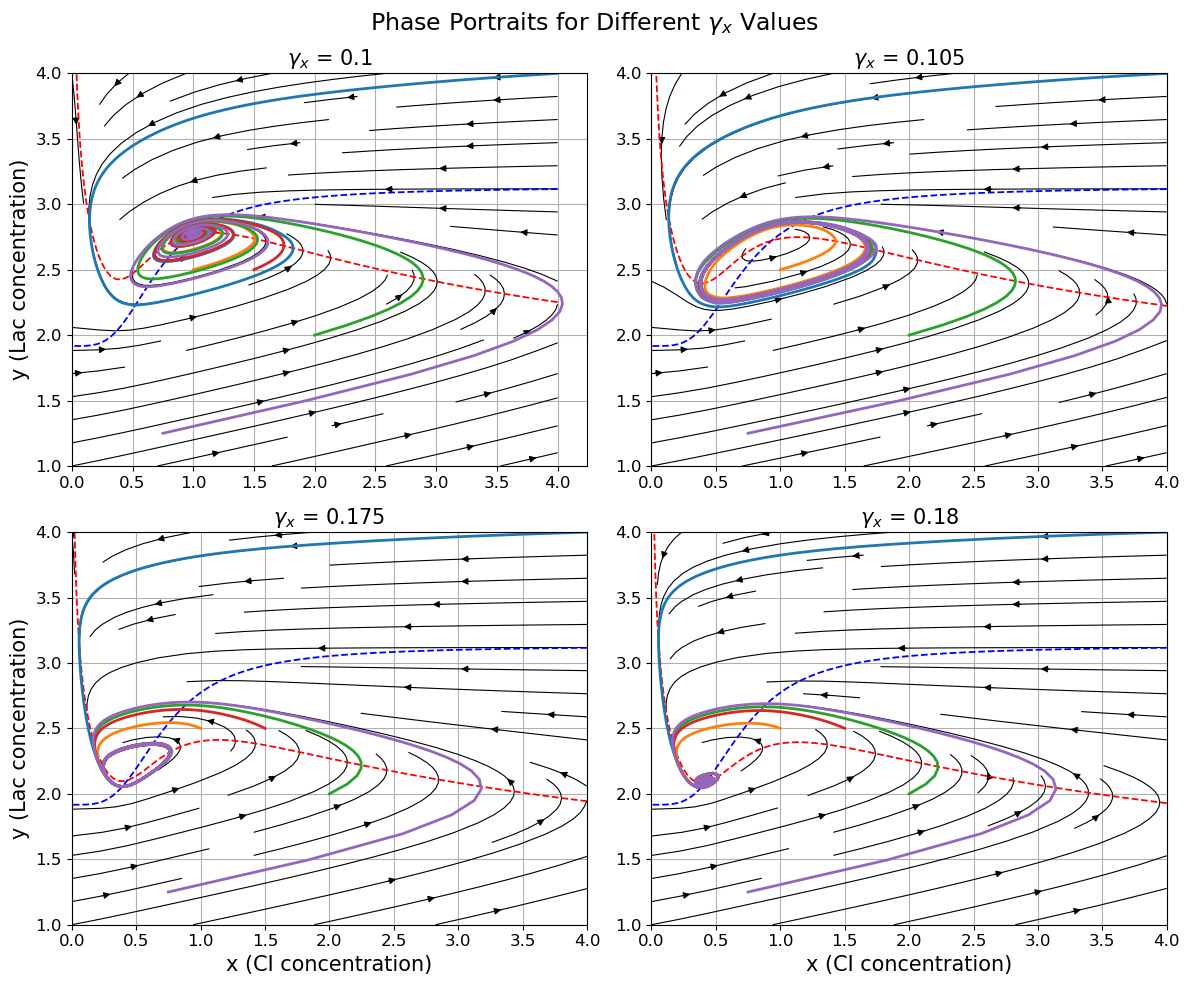

<Figure size 640x480 with 0 Axes>

In [ ]:
alpha = 11
sigma = 2
gamma_y = 0.036
tau_y = 5

t_span = [0, 800]
gamma_x_values = [0.1, 0.105, 0.175, 0.18]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Phase Portraits for Different $\gamma_x$ Values", fontsize=17)

x_vals = np.linspace(0, 4, 100)
y_vals = np.linspace(1,4,100)

X, Y = np.meshgrid(x_vals, y_vals)
coords = np.c_[X.ravel(), Y.ravel()]    

initial_conditions = [[4, 4], [1, 2.5], [2, 2], [1.5, 2.5],[0.75,1.25]]

for ax, gamma_x in zip(axes.flatten(), gamma_x_values):

    ode_rhs = np.array([system(0, [x, y], gamma_x) for x, y in coords])
    v_dot = ode_rhs[:, 0].reshape(X.shape)
    w_dot = ode_rhs[:, 1].reshape(Y.shape)

    ax.streamplot(X, Y, v_dot, w_dot, color='black', linewidth=0.8,density=0.6)
    ax.contour(X, Y, w_dot, levels=[0], colors='b', linestyles='dashed', linewidths=1.3) 
    ax.contour(X, Y, v_dot, levels=[0], colors='r', linestyles='dashed', linewidths=1.3) 

    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    colors = ['#1F77B4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#00FFC6']

    for i, ic in enumerate(initial_conditions):
        sol = solve_ivp(system, t_span, ic, t_eval=t_eval, args=(gamma_x,))
        ax.plot(sol.y[0], sol.y[1], label=f'IC: {ic}', alpha=1, color=colors[i], linewidth=2)

    ax.set_title(f"$\gamma_x$ = {gamma_x}",fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=12)

    ax.grid()
    for ax in axes[1, :]:
        ax.set_xlabel("x (CI concentration)", fontsize=15)

    for ax in axes[:, 0]:
        ax.set_ylabel("y (Lac concentration)", fontsize=15)

plt.tight_layout()
plt.show()
plt.savefig('plots/phase_portraits.png')